# Advanced Frequency Analysis of Smart Contract Risks

Welcome to this interactive tutorial on conducting advanced frequency analysis using Python in Google Colab!

## Objective
The objective of this notebook is to teach you how to handle larger datasets and create dynamic visualizations to analyze the frequency of risk tags associated with smart contracts. This will involve loading data, performing data manipulation, and visualizing the results using Python libraries such as pandas, matplotlib, and seaborn.

## Before You Start
This notebook assumes you have some familiarity with basic programming concepts and a basic understanding of Python. If you are completely new to Python, I recommend reviewing Python basics before proceeding.

Let's get started by setting up our environment and loading the data!


### Step 1: Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import networkx as nx
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

# Display plots inline
%matplotlib inline



### Step 2: Download the dataset

This step would download the Webacy Smart Contract Risk dataset. If you have your own dataset, then please add it to colab's environment.

In [2]:
!gdown 1andAuermOWqVXfhsh_AQ3Db93D3BIqgx

Downloading...
From: https://drive.google.com/uc?id=1andAuermOWqVXfhsh_AQ3Db93D3BIqgx
To: /content/compiled_risk_data.xlsx
100% 291k/291k [00:00<00:00, 25.3MB/s]


In [3]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy risk dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy risk dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [4]:
# Loading the dataset

df = pd.read_excel('/content/compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [5]:
# We can then visualize other aspects of the data.
# For example, check for data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

### Frequency Analysis

In [6]:
# Let's now look at the value counts of an individual risk tag: is_airdrop_scam

df['is_airdrop_scam'].value_counts()

,count
is_airdrop_scam,
False,902
True,65


Okay so we see that 902 rows have false for i_airdrop_cam and 65 have true for is_airdrop_scam

In [7]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

Now that we know all the risk columns let's do a full frequency analysis on these columns.

In [8]:
# Calculating the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0)  # Replace NaN with 0 for any column that may not have True values
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


Now that we have the frequencies, we can also visualize these using a barchart

<ipython-input-9-5a383aa58995>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


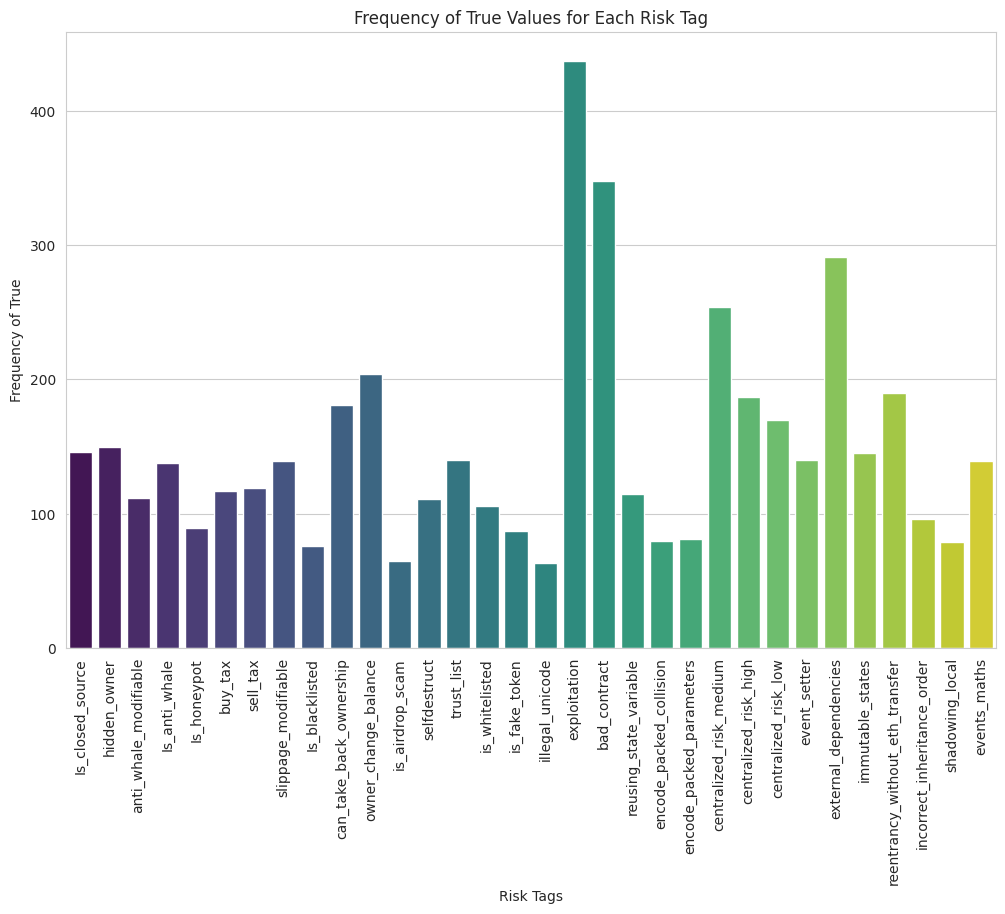

In [9]:
# Visualizing the frequencies using a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=90)
plt.show()


## **Correlation**

In [10]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['Is_honeypot'], df['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.4437039256424274


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
risk_df = df[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

# Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


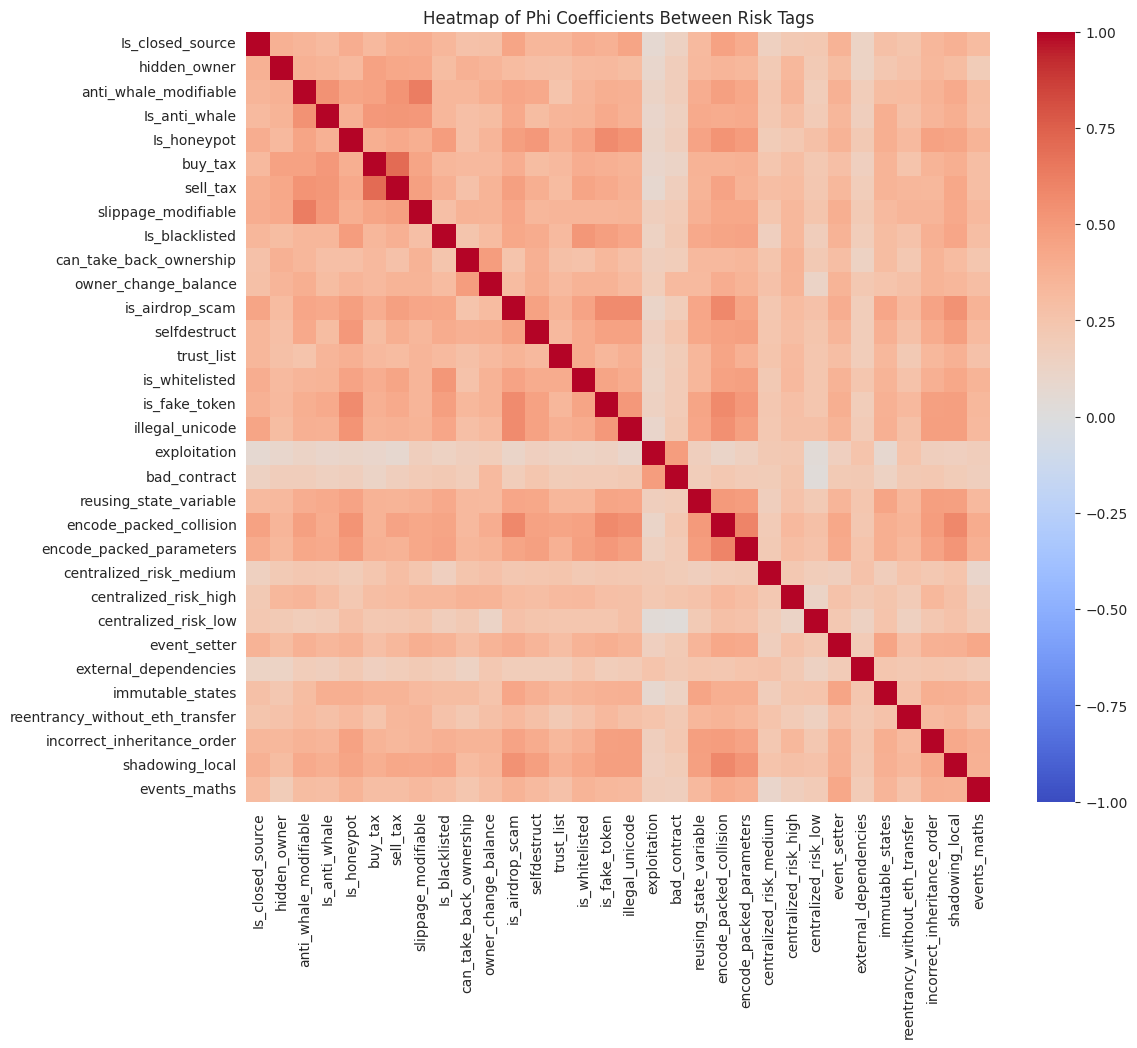

In [12]:
# Setting the size of the plot
plt.figure(figsize=(12, 10))

# Creating a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()


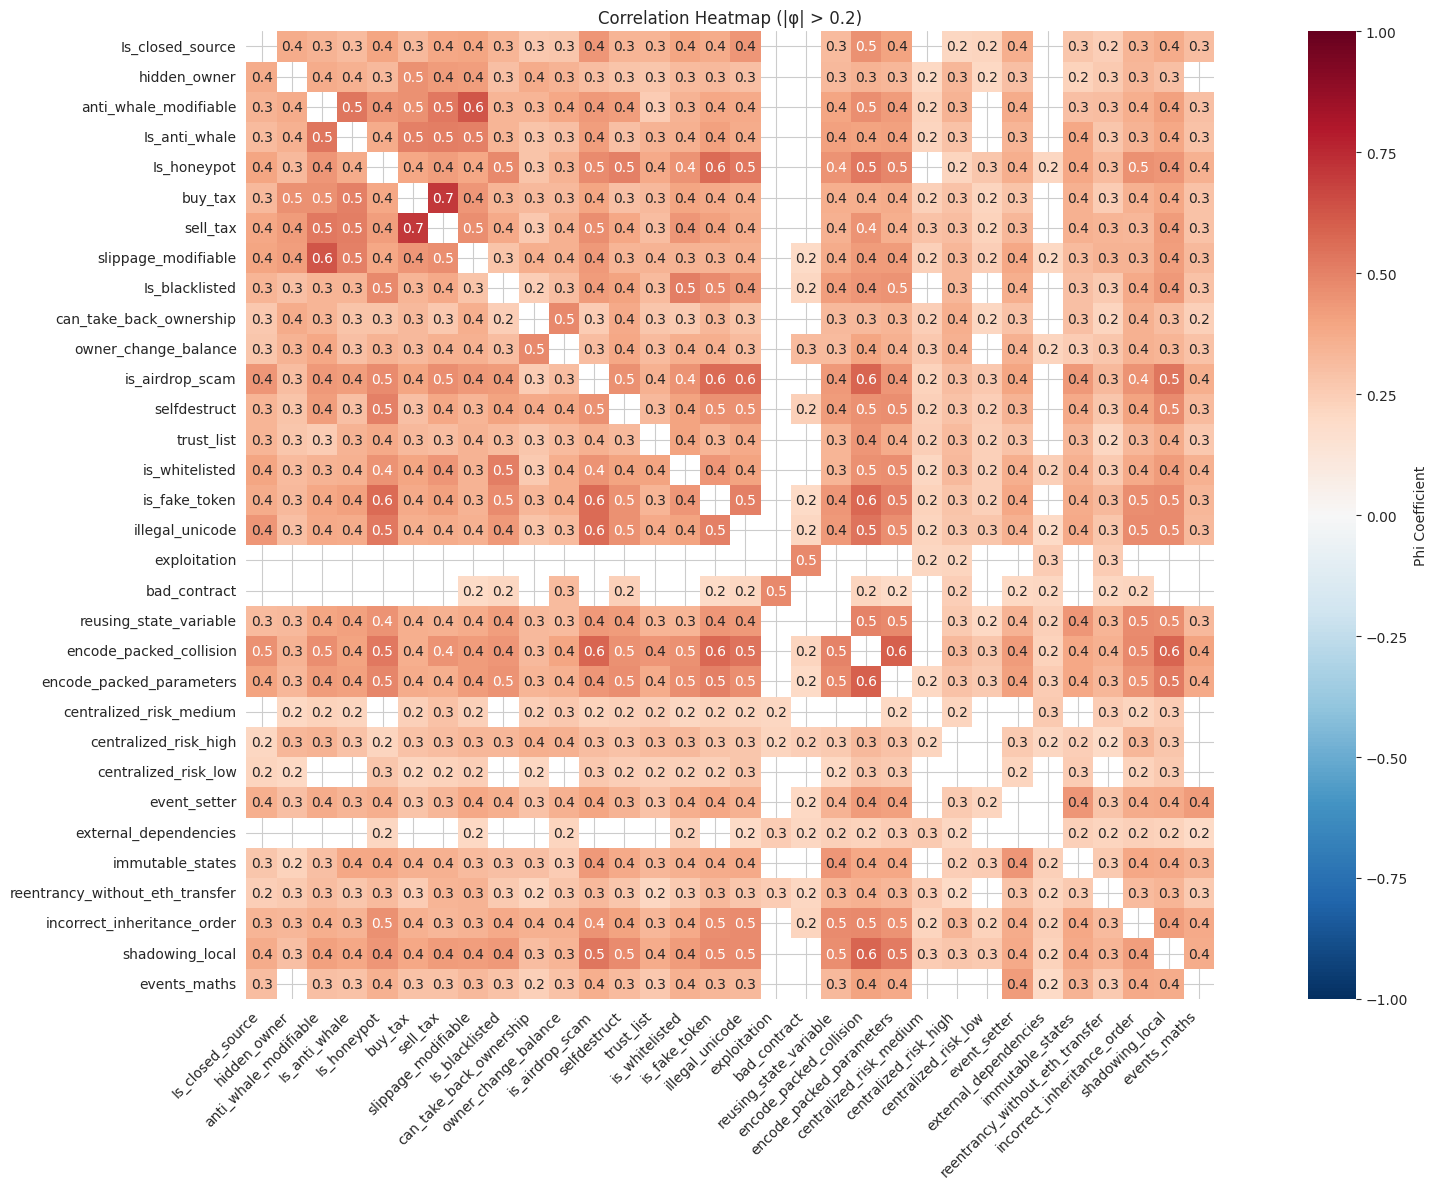

In [13]:
# Setting a figure shape
plt.figure(figsize=(19, 12))

# Creating a Filtered Heatmap
threshold=0.2 # set threshold

phi_matrix = phi_matrix.astype(float)

# Create mask for low correlations and diagonal
mask = np.abs(phi_matrix) < threshold
mask = mask.to_numpy()
np.fill_diagonal(mask, True)  # Hide diagonal

# Plot heatmap with improved formatting
sns.heatmap(phi_matrix,
            mask=mask,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            fmt='.1f',
            square=True,
            cbar_kws={'label': 'Phi Coefficient'})

plt.title(f'Correlation Heatmap (|φ| > {threshold})')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
# Top Correlations Table
# Get upper triangle
upper_tri = phi_matrix.where(np.triu(np.ones(phi_matrix.shape), k=1).astype(bool))
stacked_corrs = upper_tri.stack()
strong_corrs = stacked_corrs[np.abs(stacked_corrs) > threshold]
strong_corrs = strong_corrs.sort_values(ascending=False)

print("\nTop Positive Correlations:")
print(strong_corrs[strong_corrs > 0].head(10))
print("\nTop Negative Correlations:")
print(strong_corrs[strong_corrs < 0].head(10))




Top Positive Correlations:
buy_tax                  sell_tax                    0.710463
anti_whale_modifiable    slippage_modifiable         0.625441
encode_packed_collision  encode_packed_parameters    0.600241
                         shadowing_local             0.581962
is_airdrop_scam          encode_packed_collision     0.578995
is_fake_token            encode_packed_collision     0.574627
is_airdrop_scam          is_fake_token               0.565093
                         illegal_unicode             0.565044
Is_honeypot              is_fake_token               0.562504
illegal_unicode          encode_packed_collision     0.544344
dtype: float64

Top Negative Correlations:
Series([], dtype: float64)


In [ ]:
# Simplified Network Graph
plt.figure(figsize=(15, 15))
G = nx.Graph()

# Add edges for strong correlations
for i in range(len(phi_matrix.columns)):
    for j in range(i + 1, len(phi_matrix.columns)):
        corr = phi_matrix.iloc[i, j]
        if abs(corr) > threshold:
            G.add_edge(phi_matrix.columns[i],
                      phi_matrix.columns[j],
                      weight=abs(corr))

# Draw network
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.6)

# Draw edges with width proportional to correlation strength
edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title('Network of Strong Correlations')
plt.axis('off')
plt.tight_layout()
plt.show()

AttributeError: 'Series' object has no attribute 'columns'

In [28]:
top_10_features = frequencies.sort_values(ascending=False).head(10)
top_10_feature_names = top_10_features.index.tolist()
print(top_10_feature_names)


['exploitation', 'bad_contract', 'external_dependencies', 'centralized_risk_medium', 'owner_change_balance', 'reentrancy_without_eth_transfer', 'centralized_risk_high', 'can_take_back_ownership', 'centralized_risk_low', 'hidden_owner']


In [31]:
selected_features = risk_df[top_10_feature_names].replace({True:1, False:0})
selected_features


<ipython-input-31-a58258157d67>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_features = risk_df[top_10_feature_names].replace({True:1, False:0})


,exploitation,bad_contract,external_dependencies,centralized_risk_medium,owner_change_balance,reentrancy_without_eth_transfer,centralized_risk_high,can_take_back_ownership,centralized_risk_low,hidden_owner
0,1,1.0,1,1.0,0,1,0.0,0,0.0,0
1,0,1.0,1,0.0,1,0,0.0,0,1.0,0
2,1,0.0,1,0.0,1,0,0.0,1,1.0,0
3,1,0.0,0,1.0,0,1,0.0,0,1.0,0
4,1,0.0,1,0.0,1,1,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
962,1,NaN,1,NaN,0,1,NaN,0,NaN,0
963,1,0.0,1,0.0,0,0,1.0,0,0.0,0
964,1,0.0,1,0.0,0,0,0.0,0,0.0,0
965,1,0.0,1,1.0,0,0,0.0,0,0.0,0


In [41]:
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

In [42]:
linkage_matrix = sch.linkage(distance_matrix, method='ward')

In [43]:
linkage_matrix

array([[0.00000000e+00, 3.65000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 4.11000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.10000000e+01, 5.79000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.92700000e+03, 1.92800000e+03, 6.30592743e+00, 4.52000000e+02],
       [1.92900000e+03, 1.93000000e+03, 7.15665035e+00, 7.52000000e+02],
       [1.67000000e+03, 1.93100000e+03, 1.49824772e+01, 9.67000000e+02]])

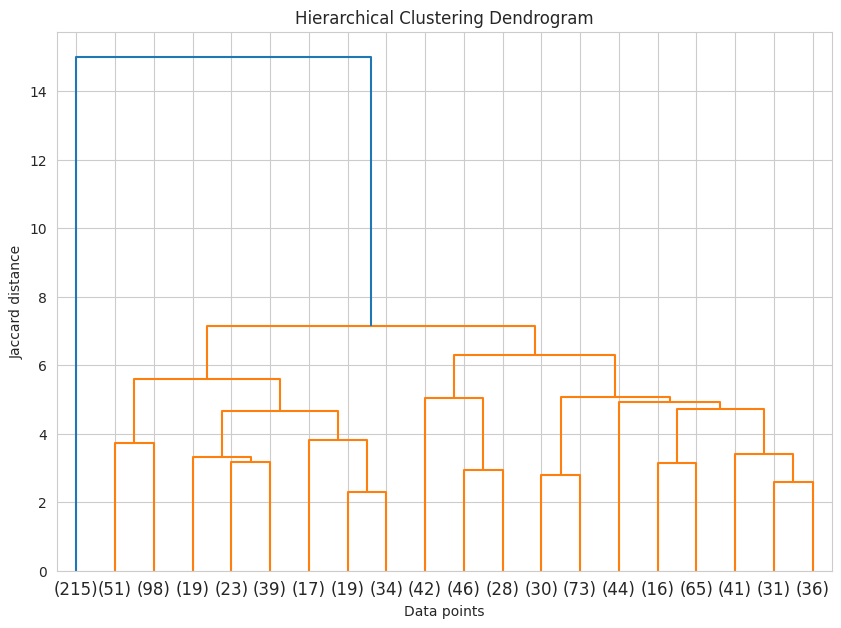

In [44]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

# Visualizing Clusters
Let's visualize the clusters formed based on the selected binary risk tags.

In [61]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
risk_df.loc[:, 'cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = risk_df[['exploitation', 'bad_contract', 'external_dependencies',
                'centralized_risk_medium', 'owner_change_balance', 'reentrancy_without_eth_transfer',
                'centralized_risk_high', 'can_take_back_ownership', 'centralized_risk_low',
                'hidden_owner','cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary.transpose()


cluster                                     1           2           3     4  \
exploitation                    mean      0.0    0.597315    0.278146   1.0   
                                std       0.0    0.492092    0.449577   0.0   
                                median    0.0    1.000000    0.000000   1.0   
                                count   215.0  149.000000  151.000000  42.0   
bad_contract                    mean      0.0    0.657718    0.119205   0.0   
                                std       0.0    0.476074    0.325108   0.0   
                                median    0.0    1.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
external_dependencies           mean      0.0    0.476510    0.112583   0.0   
                                std       0.0    0.501132    0.317134   0.0   
                                median    0.0    0.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
centralized_risk_medium         mean      0.0    0.557047    0.185430   0.0   
                                std       0.0    0.498410    0.389940   0.0   
                                median    0.0    1.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
owner_change_balance            mean      0.0    0.939597    0.026490   0.0   
                                std       0.0    0.239035    0.161122   0.0   
                                median    0.0    1.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
reentrancy_without_eth_transfer mean      0.0    0.422819    0.105960   0.0   
                                std       0.0    0.495673    0.308811   0.0   
                                median    0.0    0.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
centralized_risk_high           mean      0.0    0.476510    0.260000   0.0   
                                std       0.0    0.501132    0.440104   0.0   
                                median    0.0    0.000000    0.000000   0.0   
                                count   215.0  149.000000  150.000000  42.0   
can_take_back_ownership         mean      0.0    0.758389    0.298013   0.0   
                                std       0.0    0.429503    0.458907   0.0   
                                median    0.0    1.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
centralized_risk_low            mean      0.0    0.335570    0.562914   0.0   
                                std       0.0    0.473782    0.497677   0.0   
                                median    0.0    0.000000    1.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   
hidden_owner                    mean      0.0    0.496644    0.337748   0.0   
                                std       0.0    0.501675    0.474516   0.0   
                                median    0.0    0.000000    0.000000   0.0   
                                count   215.0  149.000000  151.000000  42.0   

cluster                                         5           6           7  
exploitation                    mean     0.621622    0.660194    0.643777  
                                std      0.488293    0.475959    0.479913  
                                median   1.000000    1.000000    1.000000  
                                count   74.000000  103.000000  233.000000  
bad_contract                    mean     1.000000    0.460784    0.476395  
                                std      0.000000    0.500921    0.500518  
                                median   1.000000    0.000000    0.000000  
                                count   74.000000  102.000000  233.000000  
external_dependencies           mean     0.000000    0.524272    0.639485  


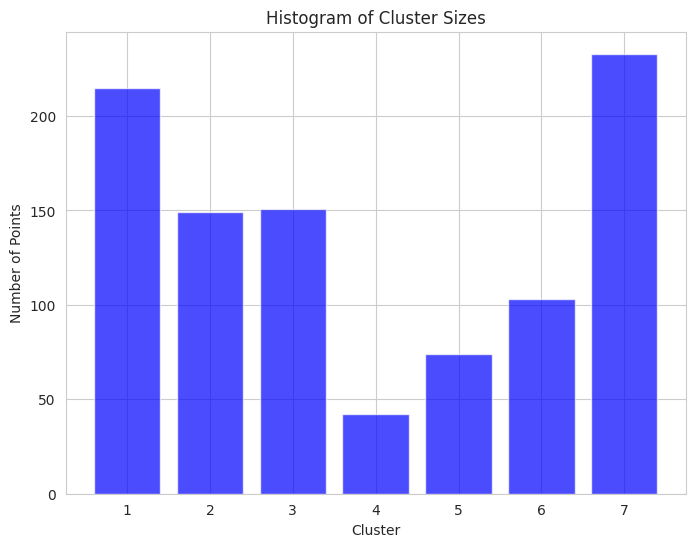

In [58]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

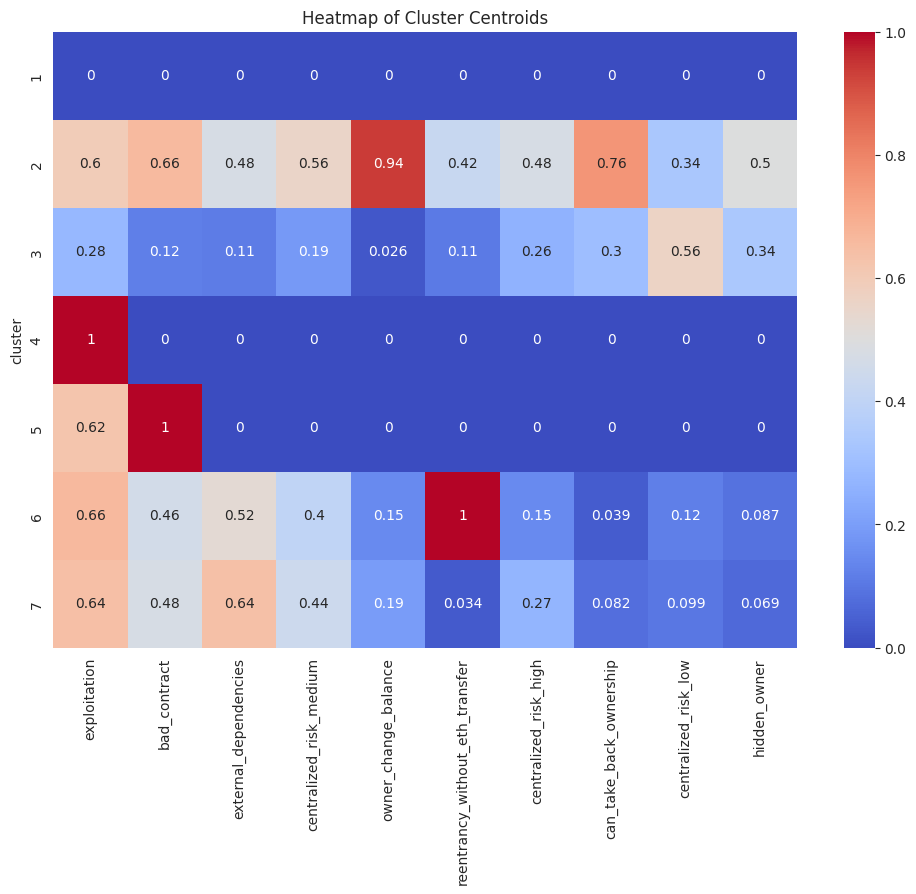

In [60]:
# Calculate the mean for each cluster and feature
cluster_centers = risk_df[['exploitation', 'bad_contract', 'external_dependencies',
                'centralized_risk_medium', 'owner_change_balance', 'reentrancy_without_eth_transfer',
                'centralized_risk_high', 'can_take_back_ownership', 'centralized_risk_low',
                'hidden_owner','cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()

In [62]:
cluster_centers

,exploitation,bad_contract,external_dependencies,centralized_risk_medium,owner_change_balance,reentrancy_without_eth_transfer,centralized_risk_high,can_take_back_ownership,centralized_risk_low,hidden_owner
cluster,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.597315,0.657718,0.476510,0.557047,0.939597,0.422819,0.476510,0.758389,0.335570,0.496644
3,0.278146,0.119205,0.112583,0.185430,0.026490,0.105960,0.260000,0.298013,0.562914,0.337748
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.621622,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.660194,0.460784,0.524272,0.401961,0.145631,1.000000,0.147059,0.038835,0.117647,0.087379
7,0.643777,0.476395,0.639485,0.437768,0.193133,0.034335,0.266094,0.081545,0.098712,0.068670
